In [ ]:
!pip install torch torchvision

In [ ]:
import torch, torchvision
from torch import nn, optim

In [ ]:
class Encoder(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()

        self.layer = nn.Linear(784, 2)

    def forward(self, x):
        x = self.layer(x)

        return x

In [ ]:
class Decoder(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()

        self.layer = nn.Linear(2, 784)

    def forward(self, x):
        x = self.layer(x)

        return x

In [ ]:
class AE(nn.Module):
    def __init__(self, **kwargs):
        super().__init__()

        self.encoder = Encoder()
        self.decoder = Decoder()

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)

        return x

In [ ]:
#  use gpu if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create a model from `AE` autoencoder class
# load it to the specified device, either gpu or cpu
model = AE().to(device)

# create an optimizer object
# Adam optimizer with learning rate 1e-3
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# mean-squared error loss
criterion = nn.MSELoss()

In [ ]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=True, transform=transform, download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=False, transform=transform, download=True
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=128, shuffle=True, num_workers=4, pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=32, shuffle=False, num_workers=4
)

In [ ]:
epochs = 50
for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
        # reshape mini-batch data to [N, 784] matrix
        # load it to the active device
        batch_features = batch_features.view(-1, 784).to(device)
        
        # reset the gradients back to zero
        # PyTorch accumulates gradients on subsequent backward passes
        optimizer.zero_grad()
        
        # compute reconstructions
        outputs = model(batch_features)
        
        # compute training reconstruction loss
        train_loss = criterion(outputs, batch_features)
        
        # compute accumulated gradients
        train_loss.backward()
        
        # perform parameter update based on current gradients
        optimizer.step()
        
        # add the mini-batch training loss to epoch loss
        loss += train_loss.item()
    
    # compute the epoch training loss
    loss = loss / len(train_loader)
    
    # display the epoch training loss
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))

epoch : 1/50, loss = 0.141340
epoch : 2/50, loss = 0.066893
epoch : 3/50, loss = 0.065434
epoch : 4/50, loss = 0.064636
epoch : 5/50, loss = 0.063448
epoch : 6/50, loss = 0.061755
epoch : 7/50, loss = 0.059898
epoch : 8/50, loss = 0.058463
epoch : 9/50, loss = 0.057591
epoch : 10/50, loss = 0.057109
epoch : 11/50, loss = 0.056825
epoch : 12/50, loss = 0.056661
epoch : 13/50, loss = 0.056541
epoch : 14/50, loss = 0.056465
epoch : 15/50, loss = 0.056396
epoch : 16/50, loss = 0.056346
epoch : 17/50, loss = 0.056301
epoch : 18/50, loss = 0.056261
epoch : 19/50, loss = 0.056224
epoch : 20/50, loss = 0.056193
epoch : 21/50, loss = 0.056163
epoch : 22/50, loss = 0.056136
epoch : 23/50, loss = 0.056116
epoch : 24/50, loss = 0.056094
epoch : 25/50, loss = 0.056076
epoch : 26/50, loss = 0.056059
epoch : 27/50, loss = 0.056055
epoch : 28/50, loss = 0.056035
epoch : 29/50, loss = 0.056025
epoch : 30/50, loss = 0.056020
epoch : 31/50, loss = 0.056011
epoch : 32/50, loss = 0.056007
epoch : 33/50, lo

In [ ]:
import matplotlib.pyplot as plt

torch.Size([32, 784])


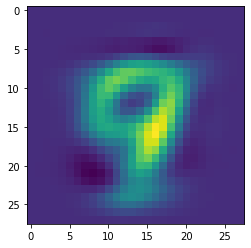

torch.Size([32, 784])


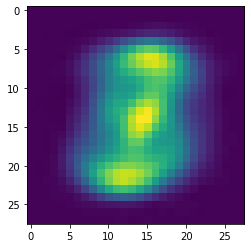

torch.Size([32, 784])


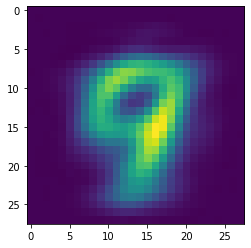

torch.Size([32, 784])


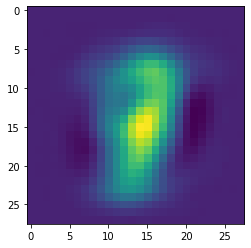

torch.Size([32, 784])


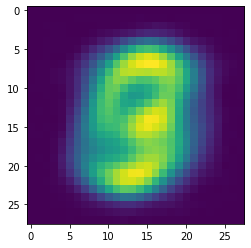

torch.Size([32, 784])


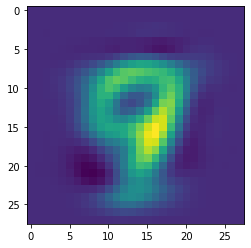

torch.Size([32, 784])


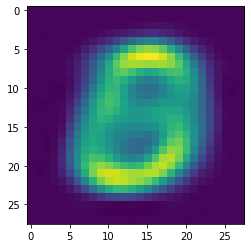

torch.Size([32, 784])


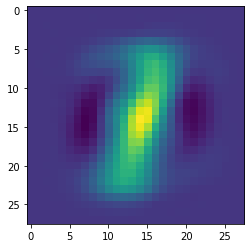

torch.Size([32, 784])


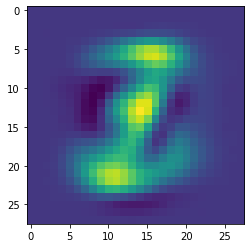

torch.Size([32, 784])


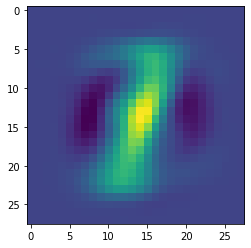

torch.Size([32, 784])


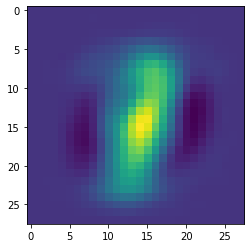

torch.Size([32, 784])


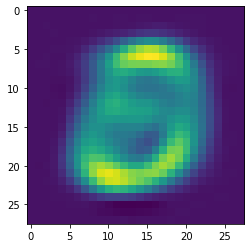

torch.Size([32, 784])


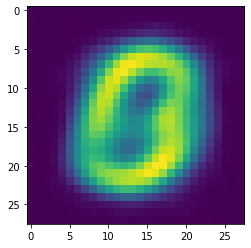

torch.Size([32, 784])


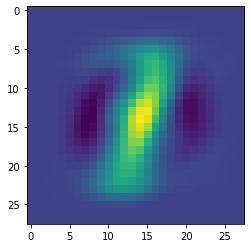

torch.Size([32, 784])


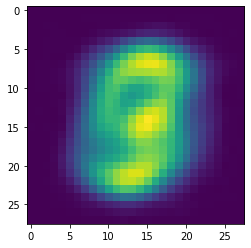

torch.Size([32, 784])


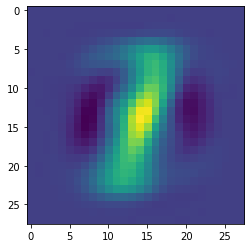

torch.Size([32, 784])


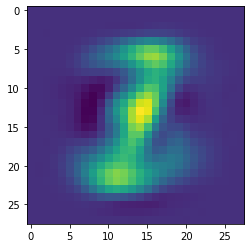

torch.Size([32, 784])


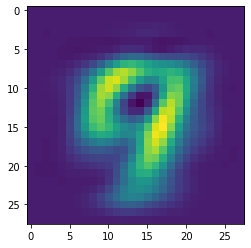

torch.Size([32, 784])


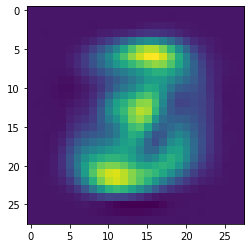

torch.Size([32, 784])


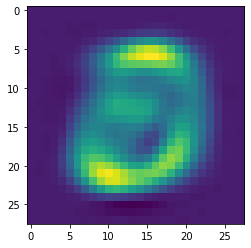

torch.Size([32, 784])


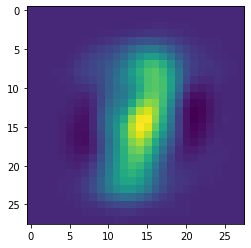

torch.Size([32, 784])


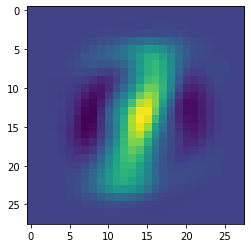

torch.Size([32, 784])


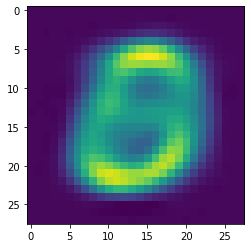

torch.Size([32, 784])


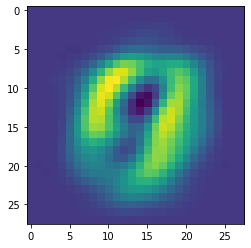

torch.Size([32, 784])


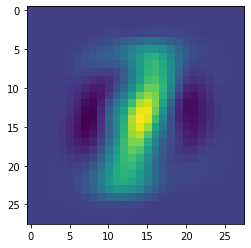

torch.Size([32, 784])


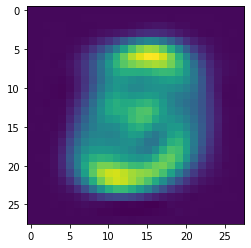

torch.Size([32, 784])


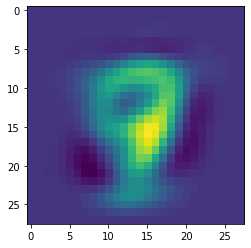

torch.Size([32, 784])


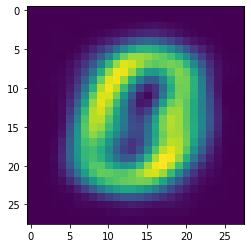

torch.Size([32, 784])


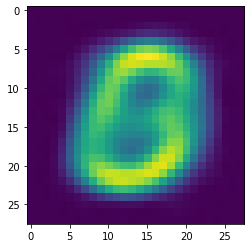

torch.Size([32, 784])


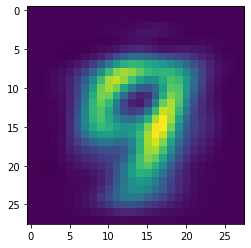

torch.Size([32, 784])


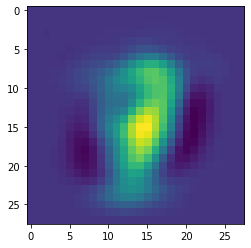

torch.Size([32, 784])


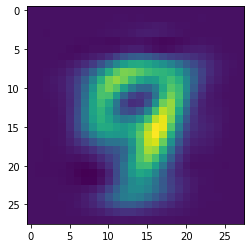

torch.Size([32, 784])


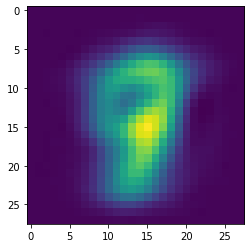

torch.Size([32, 784])


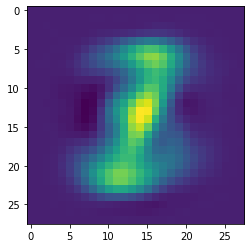

torch.Size([32, 784])


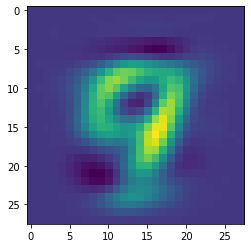

torch.Size([32, 784])


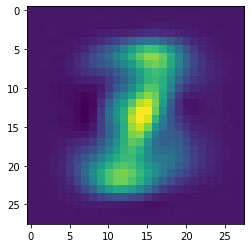

torch.Size([32, 784])


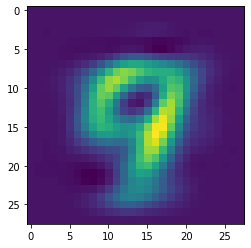

torch.Size([32, 784])


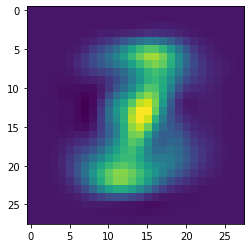

torch.Size([32, 784])


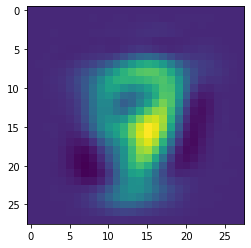

torch.Size([32, 784])


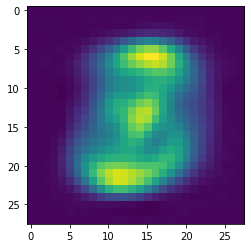

torch.Size([32, 784])


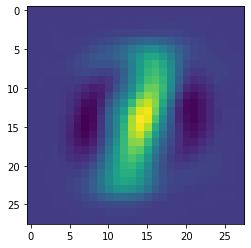

torch.Size([32, 784])


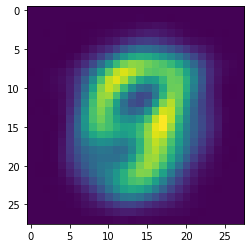

torch.Size([32, 784])


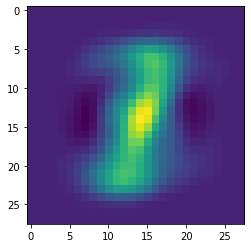

torch.Size([32, 784])


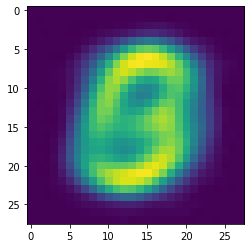

torch.Size([32, 784])


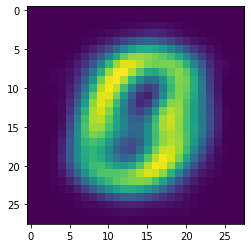

torch.Size([32, 784])


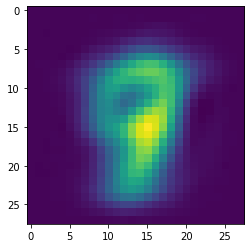

torch.Size([32, 784])


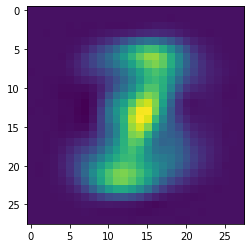

torch.Size([32, 784])


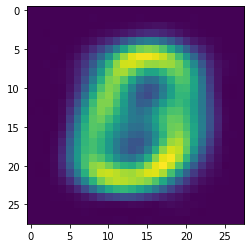

torch.Size([32, 784])


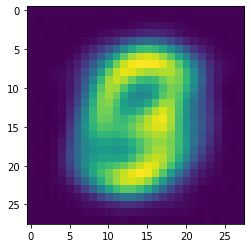

torch.Size([32, 784])


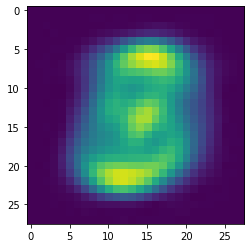

torch.Size([32, 784])


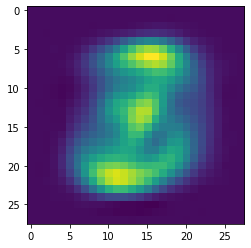

torch.Size([32, 784])


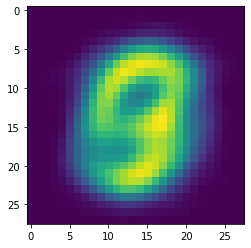

torch.Size([32, 784])


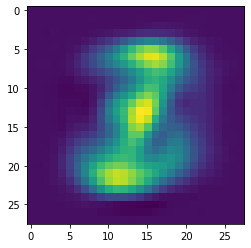

torch.Size([32, 784])


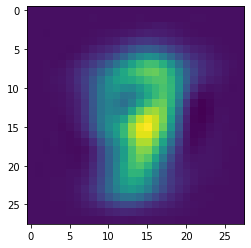

torch.Size([32, 784])


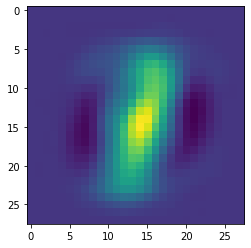

torch.Size([32, 784])


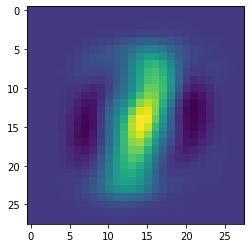

torch.Size([32, 784])


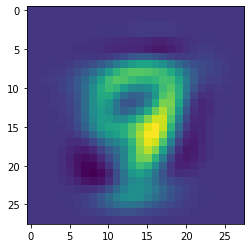

torch.Size([32, 784])


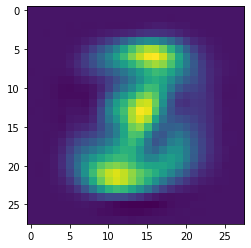

torch.Size([32, 784])


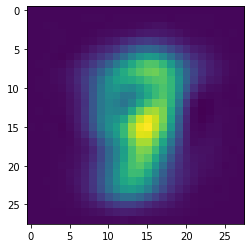

torch.Size([32, 784])


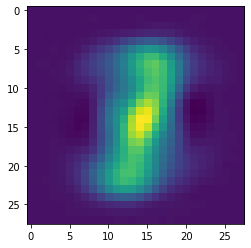

torch.Size([32, 784])


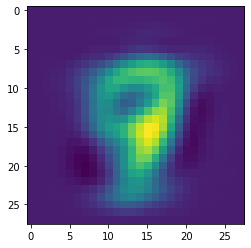

torch.Size([32, 784])


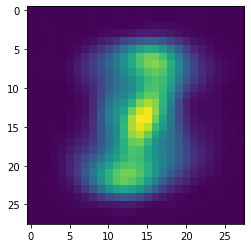

torch.Size([32, 784])


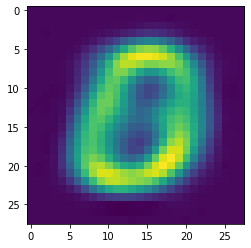

torch.Size([32, 784])


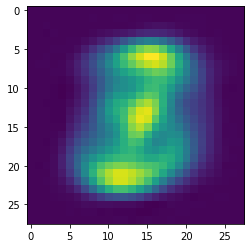

torch.Size([32, 784])


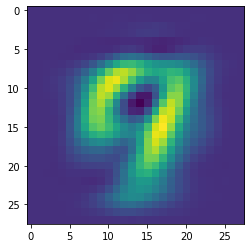

torch.Size([32, 784])


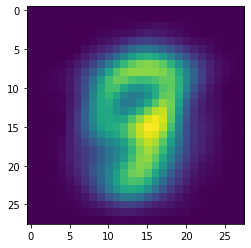

torch.Size([32, 784])


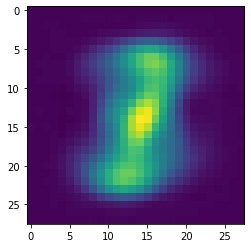

torch.Size([32, 784])


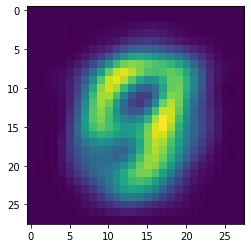

torch.Size([32, 784])


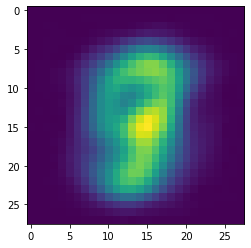

torch.Size([32, 784])


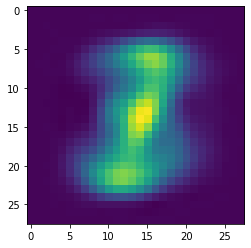

torch.Size([32, 784])


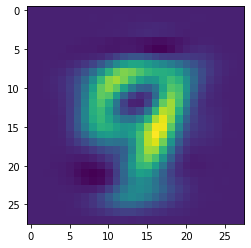

torch.Size([32, 784])


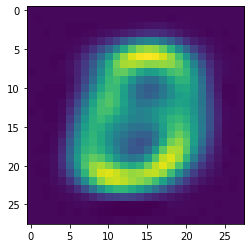

torch.Size([32, 784])


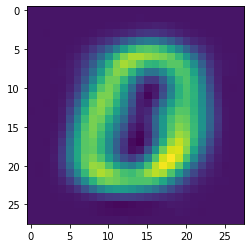

torch.Size([32, 784])


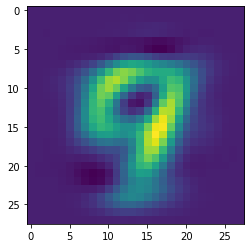

torch.Size([32, 784])


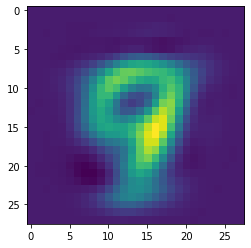

torch.Size([32, 784])


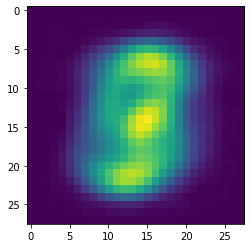

torch.Size([32, 784])


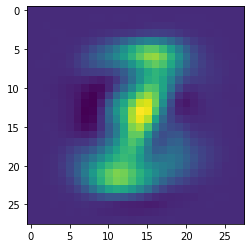

torch.Size([32, 784])


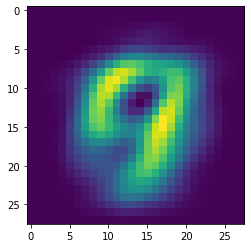

torch.Size([32, 784])


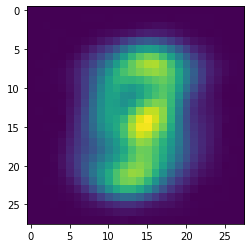

torch.Size([32, 784])


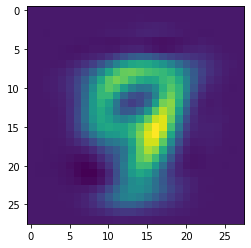

torch.Size([32, 784])


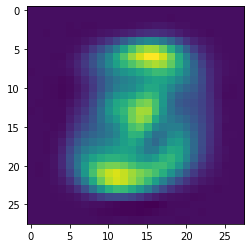

torch.Size([32, 784])


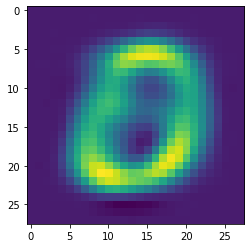

torch.Size([32, 784])


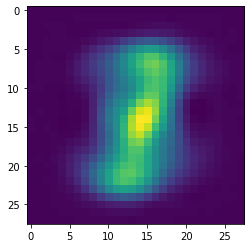

torch.Size([32, 784])


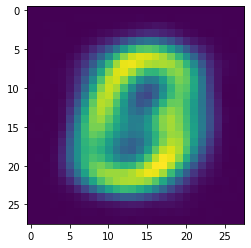

torch.Size([32, 784])


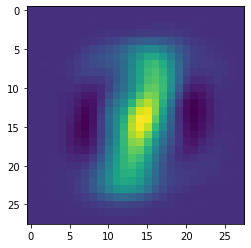

torch.Size([32, 784])


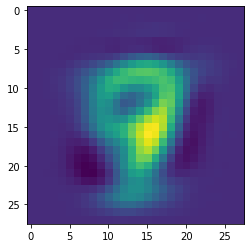

torch.Size([32, 784])


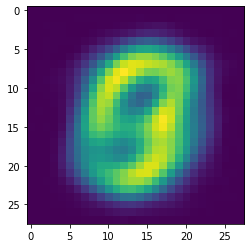

torch.Size([32, 784])


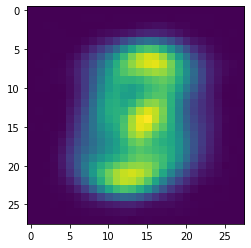

torch.Size([32, 784])


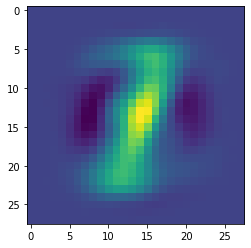

torch.Size([32, 784])


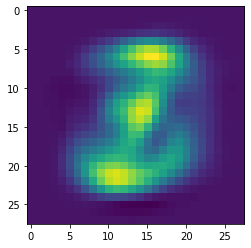

torch.Size([32, 784])


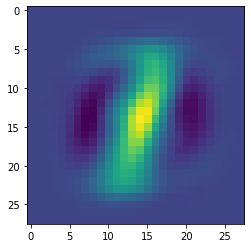

torch.Size([32, 784])


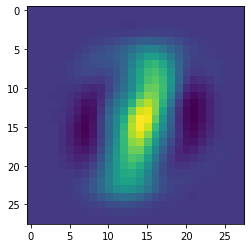

torch.Size([32, 784])


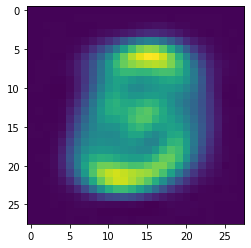

torch.Size([32, 784])


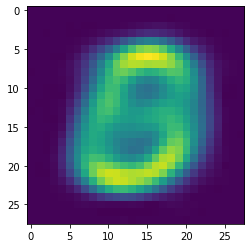

torch.Size([32, 784])


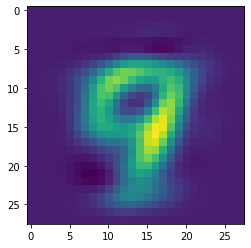

torch.Size([32, 784])


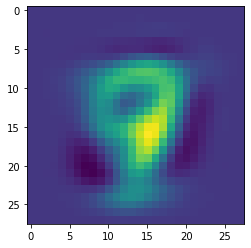

torch.Size([32, 784])


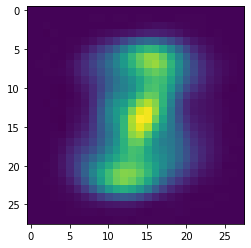

torch.Size([32, 784])


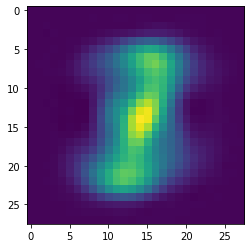

torch.Size([32, 784])


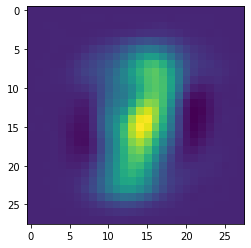

torch.Size([32, 784])


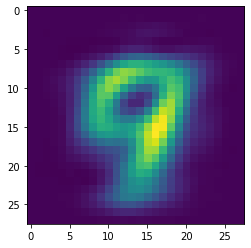

torch.Size([32, 784])


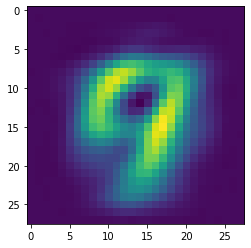

torch.Size([32, 784])


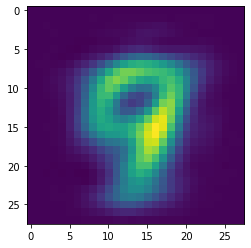

torch.Size([32, 784])


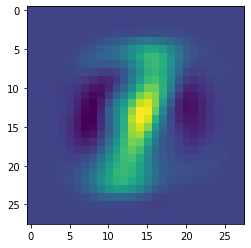

torch.Size([32, 784])


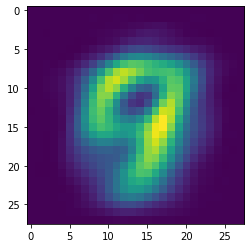

torch.Size([32, 784])


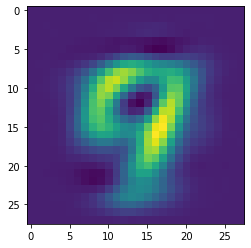

torch.Size([32, 784])


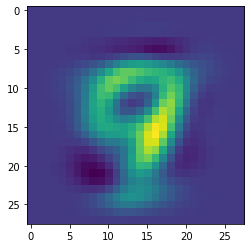

torch.Size([32, 784])


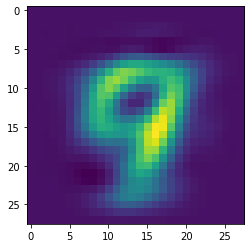

torch.Size([32, 784])


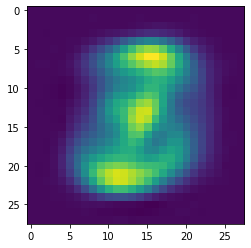

torch.Size([32, 784])


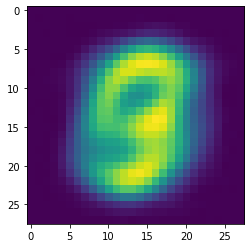

torch.Size([32, 784])


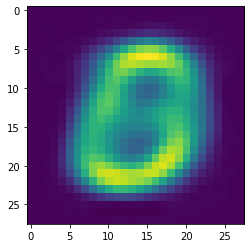

torch.Size([32, 784])


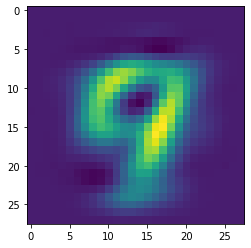

torch.Size([32, 784])


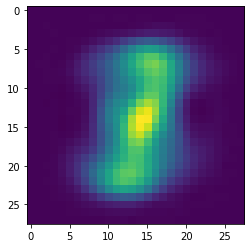

torch.Size([32, 784])


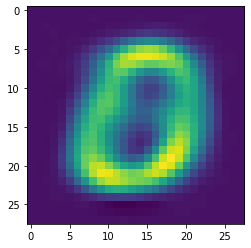

torch.Size([32, 784])


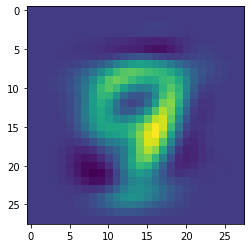

torch.Size([32, 784])


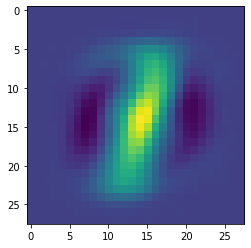

torch.Size([32, 784])


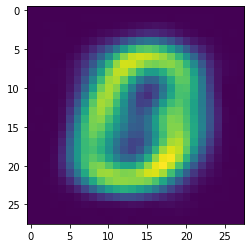

torch.Size([32, 784])


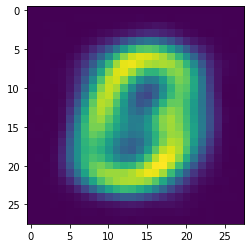

torch.Size([32, 784])


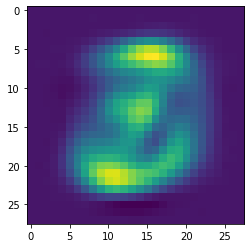

torch.Size([32, 784])


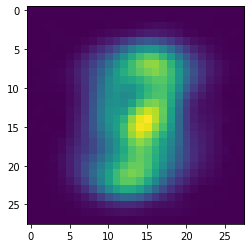

torch.Size([32, 784])


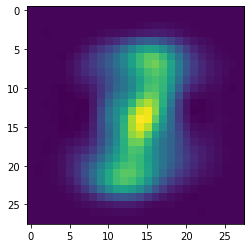

torch.Size([32, 784])


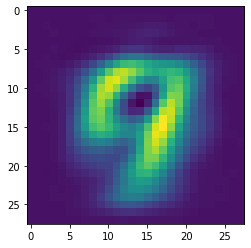

torch.Size([32, 784])


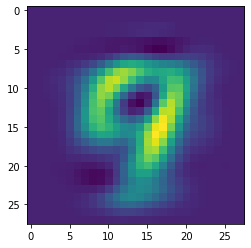

torch.Size([32, 784])


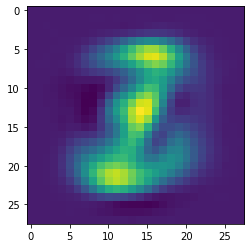

torch.Size([32, 784])


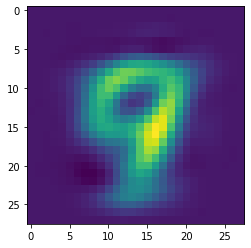

torch.Size([32, 784])


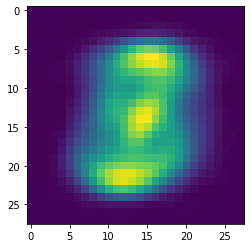

torch.Size([32, 784])


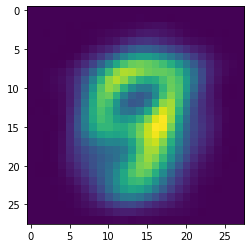

torch.Size([32, 784])


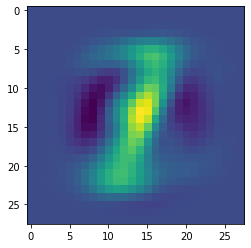

torch.Size([32, 784])


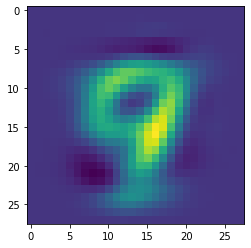

torch.Size([32, 784])


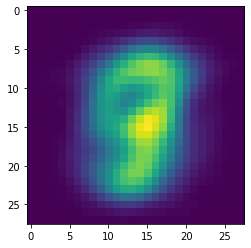

torch.Size([32, 784])


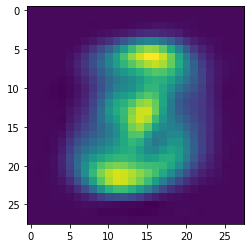

torch.Size([32, 784])


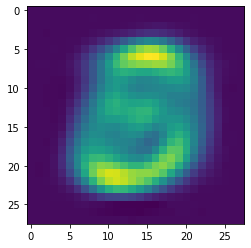

torch.Size([32, 784])


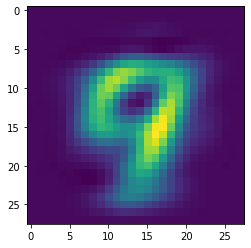

torch.Size([32, 784])


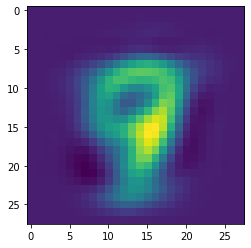

torch.Size([32, 784])


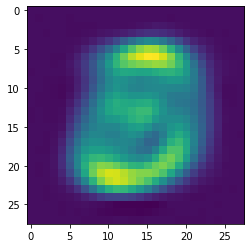

torch.Size([32, 784])


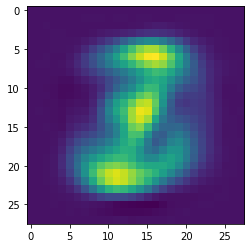

torch.Size([32, 784])


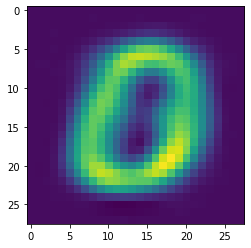

torch.Size([32, 784])


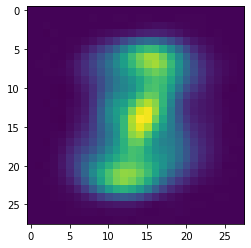

torch.Size([32, 784])


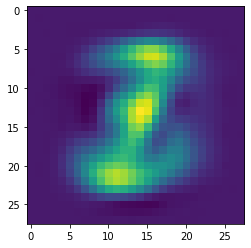

torch.Size([32, 784])


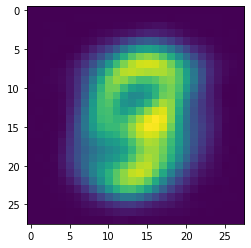

torch.Size([32, 784])


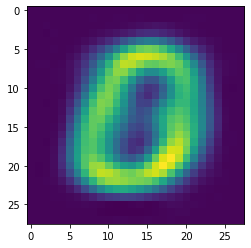

torch.Size([32, 784])


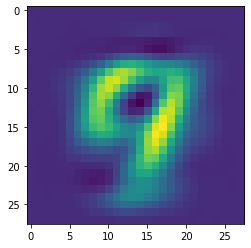

torch.Size([32, 784])


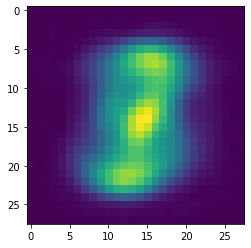

torch.Size([32, 784])


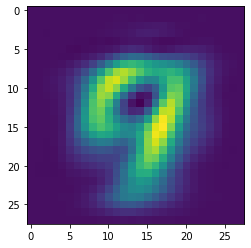

torch.Size([32, 784])


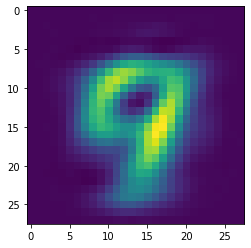

torch.Size([32, 784])


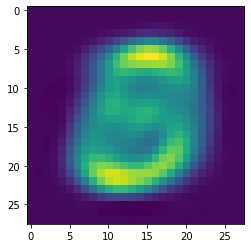

torch.Size([32, 784])


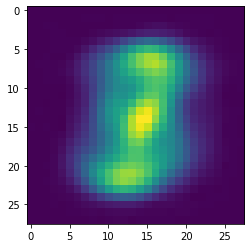

torch.Size([32, 784])


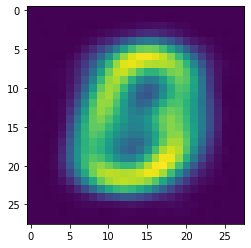

torch.Size([32, 784])


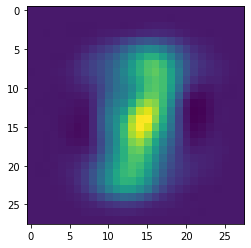

torch.Size([32, 784])


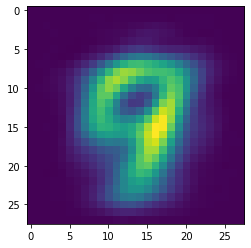

torch.Size([32, 784])


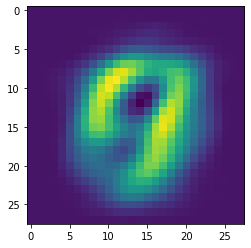

torch.Size([32, 784])


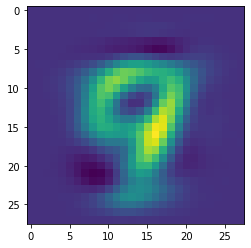

torch.Size([32, 784])


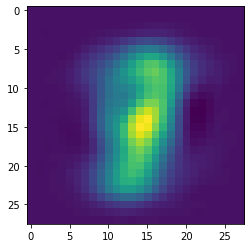

torch.Size([32, 784])


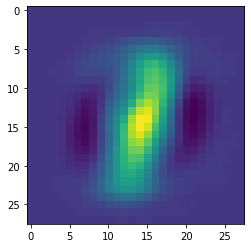

torch.Size([32, 784])


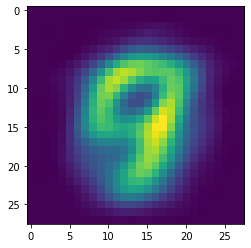

torch.Size([32, 784])


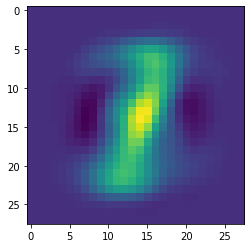

torch.Size([32, 784])


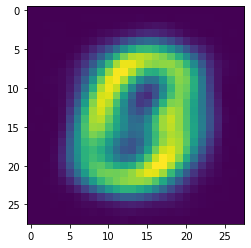

torch.Size([32, 784])


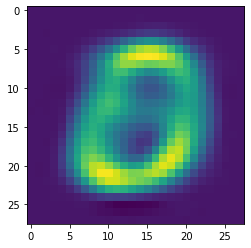

torch.Size([32, 784])


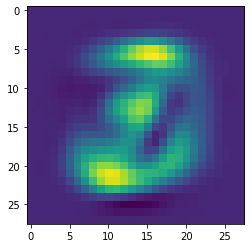

torch.Size([32, 784])


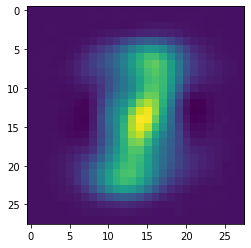

torch.Size([32, 784])


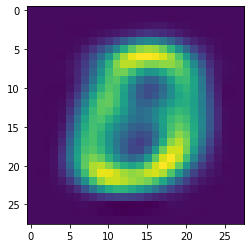

torch.Size([32, 784])


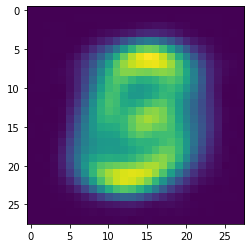

torch.Size([32, 784])


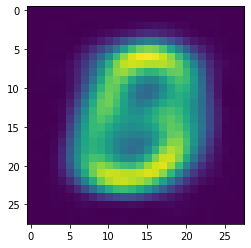

torch.Size([32, 784])


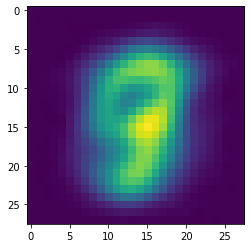

torch.Size([32, 784])


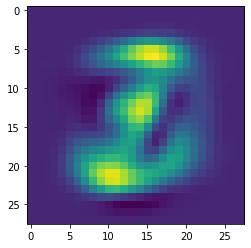

torch.Size([32, 784])


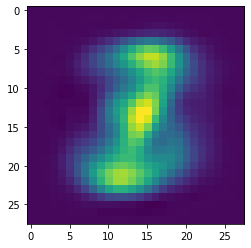

torch.Size([32, 784])


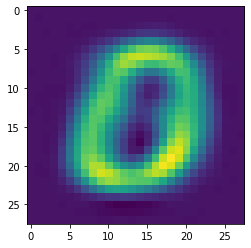

torch.Size([32, 784])


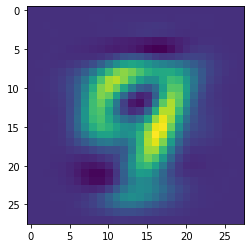

torch.Size([32, 784])


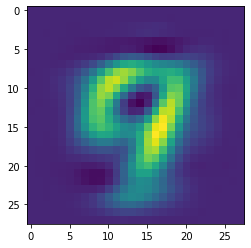

torch.Size([32, 784])


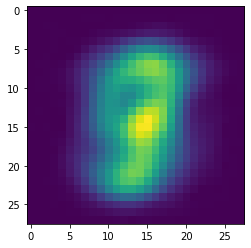

torch.Size([32, 784])


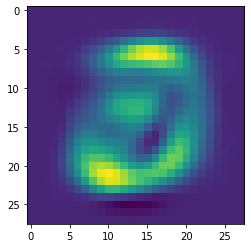

torch.Size([32, 784])


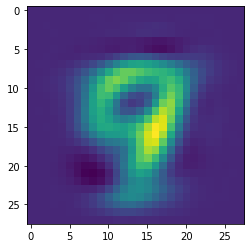

torch.Size([32, 784])


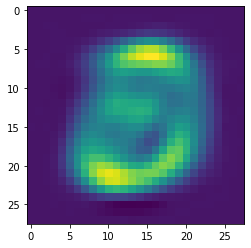

torch.Size([32, 784])


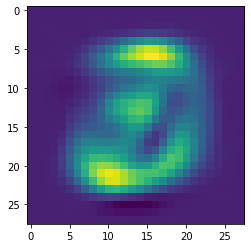

torch.Size([32, 784])


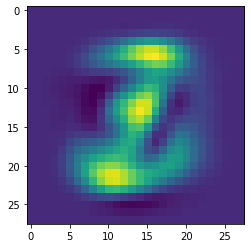

torch.Size([32, 784])


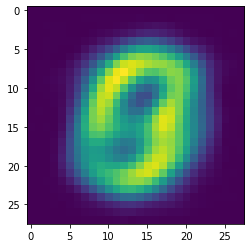

torch.Size([32, 784])


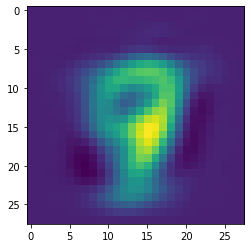

torch.Size([32, 784])


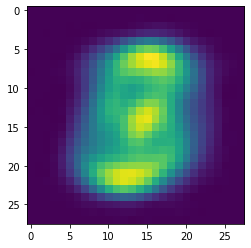

torch.Size([32, 784])


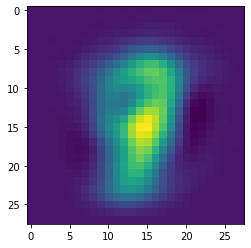

torch.Size([32, 784])


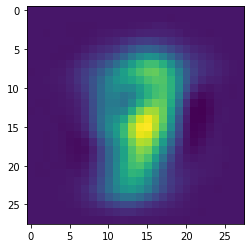

torch.Size([32, 784])


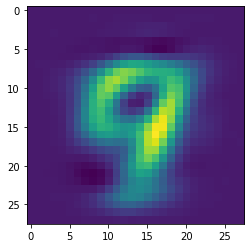

torch.Size([32, 784])


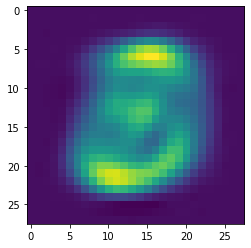

torch.Size([32, 784])


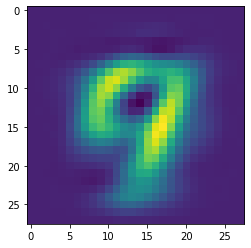

torch.Size([32, 784])


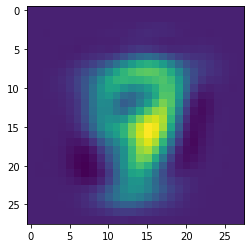

torch.Size([32, 784])


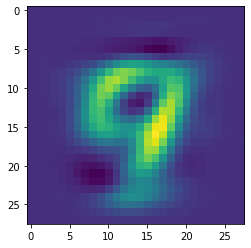

torch.Size([32, 784])


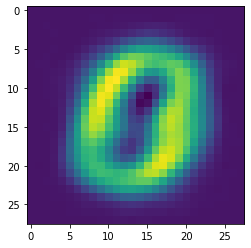

torch.Size([32, 784])


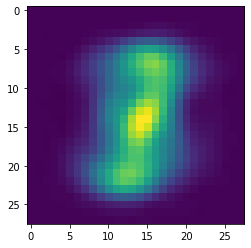

torch.Size([32, 784])


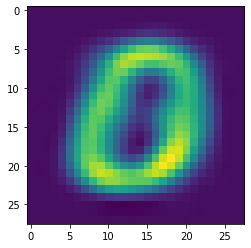

torch.Size([32, 784])


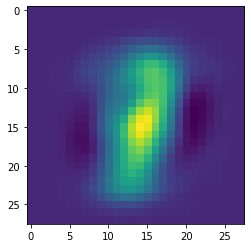

torch.Size([32, 784])


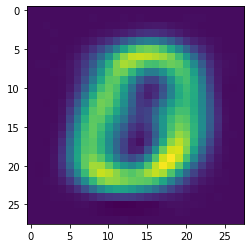

torch.Size([32, 784])


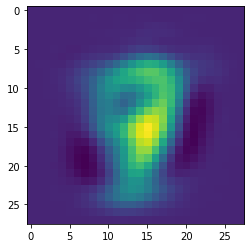

torch.Size([32, 784])


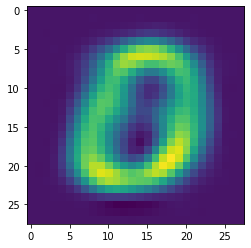

torch.Size([32, 784])


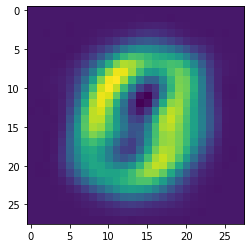

torch.Size([32, 784])


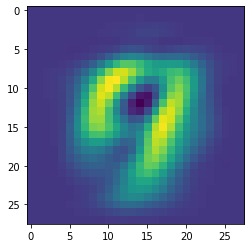

torch.Size([32, 784])


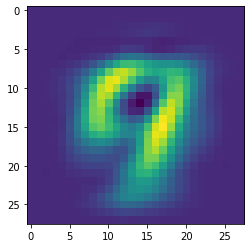

torch.Size([32, 784])


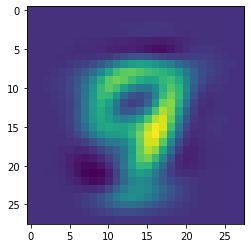

torch.Size([32, 784])


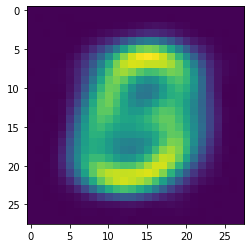

torch.Size([32, 784])


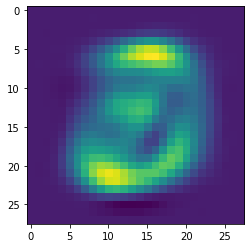

torch.Size([32, 784])


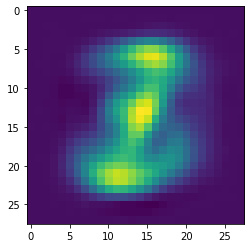

torch.Size([32, 784])


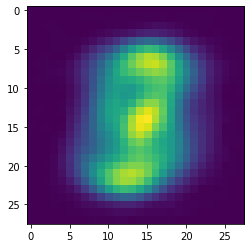

torch.Size([32, 784])


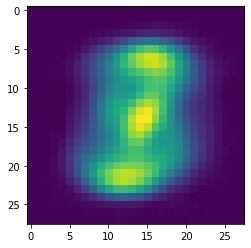

torch.Size([32, 784])


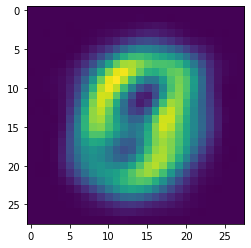

torch.Size([32, 784])


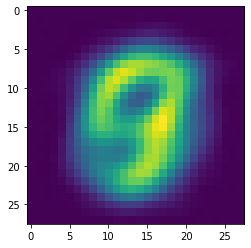

torch.Size([32, 784])


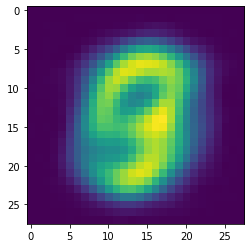

torch.Size([32, 784])


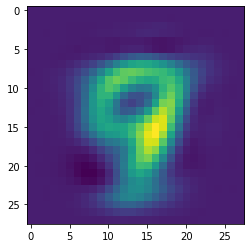

torch.Size([32, 784])


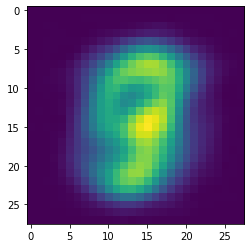

torch.Size([32, 784])


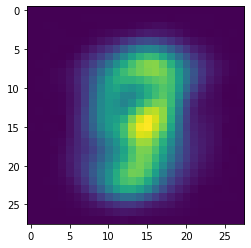

torch.Size([32, 784])


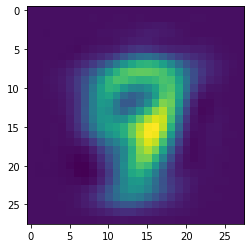

torch.Size([32, 784])


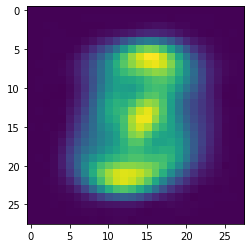

torch.Size([32, 784])


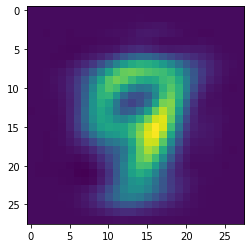

torch.Size([32, 784])


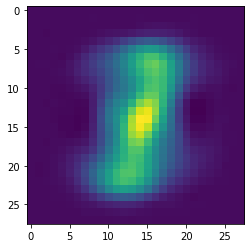

torch.Size([32, 784])


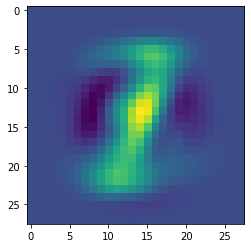

torch.Size([32, 784])


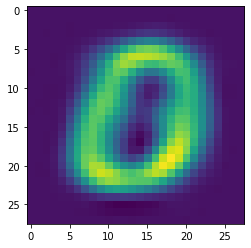

torch.Size([32, 784])


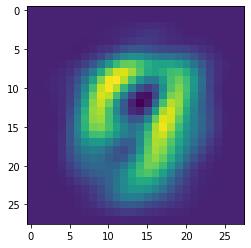

torch.Size([32, 784])


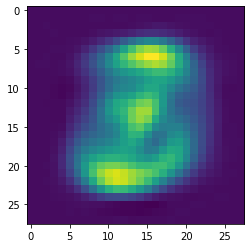

torch.Size([32, 784])


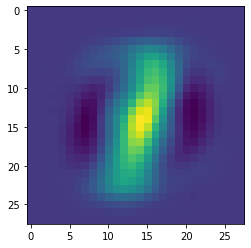

torch.Size([32, 784])


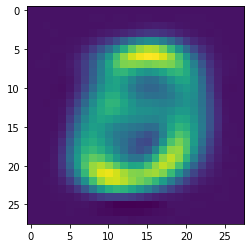

torch.Size([32, 784])


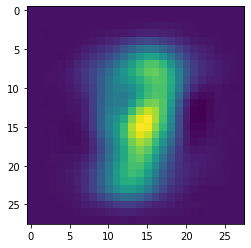

torch.Size([32, 784])


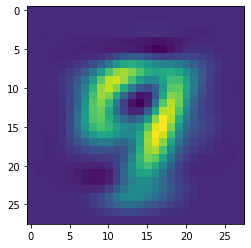

torch.Size([32, 784])


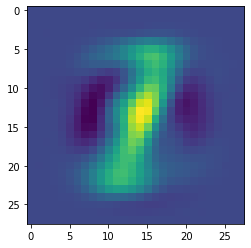

torch.Size([32, 784])


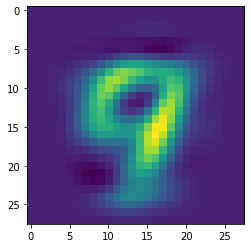

torch.Size([32, 784])


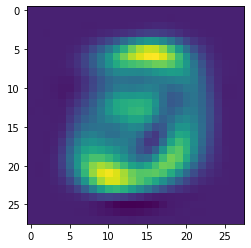

torch.Size([32, 784])


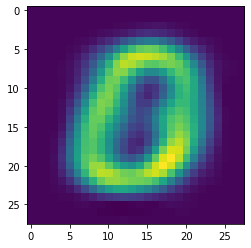

torch.Size([32, 784])


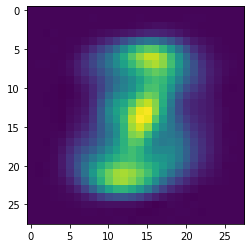

torch.Size([32, 784])


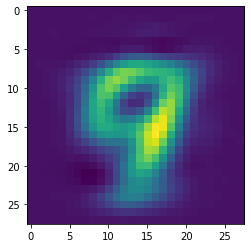

torch.Size([32, 784])


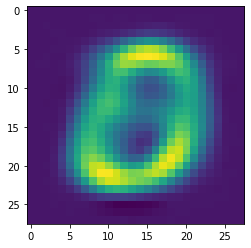

torch.Size([32, 784])


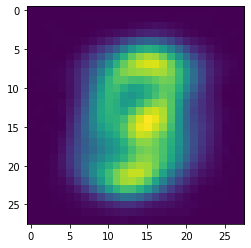

torch.Size([32, 784])


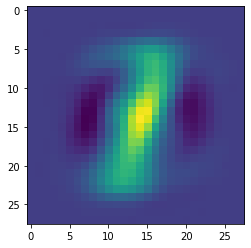

torch.Size([32, 784])


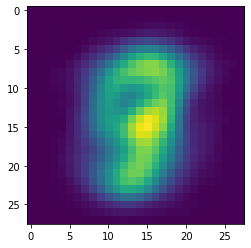

torch.Size([32, 784])


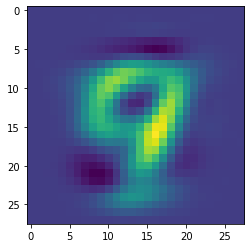

torch.Size([32, 784])


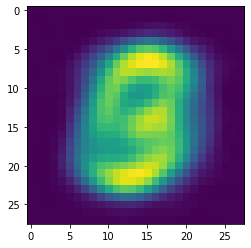

torch.Size([32, 784])


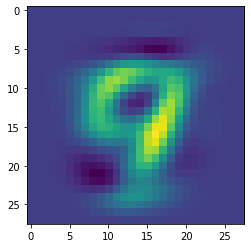

torch.Size([32, 784])


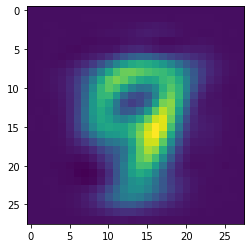

torch.Size([32, 784])


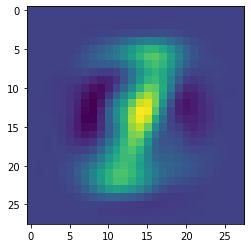

torch.Size([32, 784])


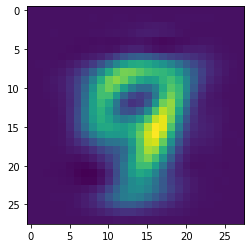

torch.Size([32, 784])


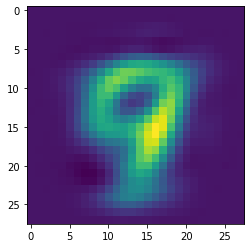

torch.Size([32, 784])


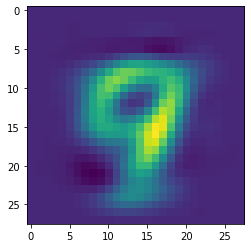

torch.Size([32, 784])


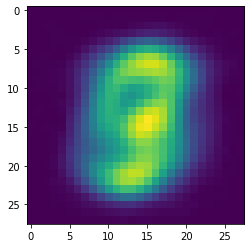

torch.Size([32, 784])


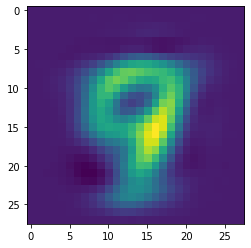

torch.Size([32, 784])


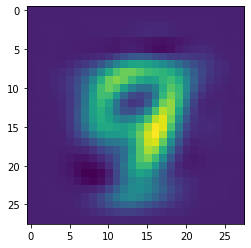

torch.Size([32, 784])


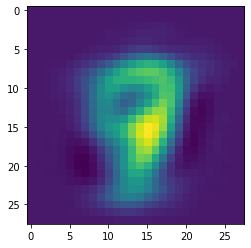

torch.Size([32, 784])


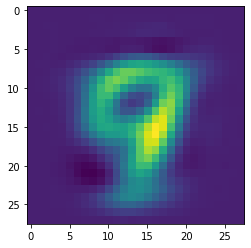

torch.Size([32, 784])


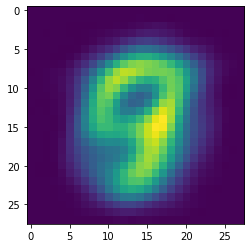

torch.Size([32, 784])


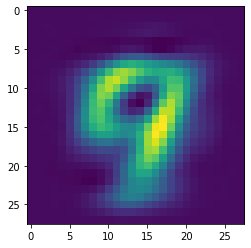

torch.Size([32, 784])


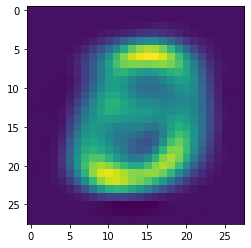

torch.Size([32, 784])


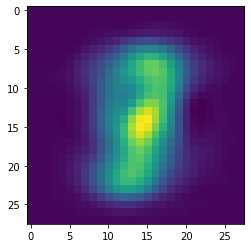

torch.Size([32, 784])


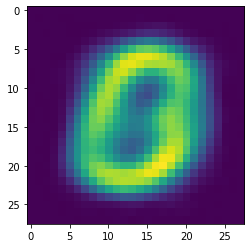

torch.Size([32, 784])


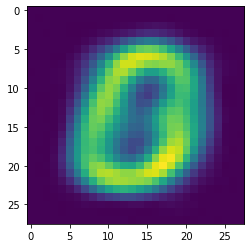

torch.Size([32, 784])


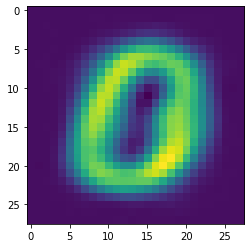

torch.Size([32, 784])


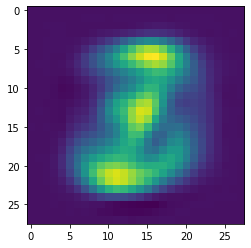

torch.Size([32, 784])


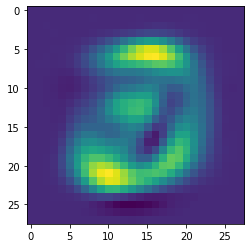

torch.Size([32, 784])


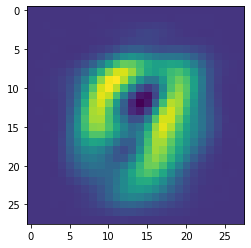

torch.Size([32, 784])


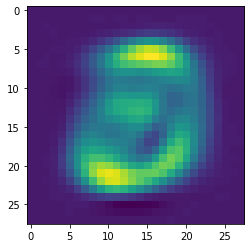

torch.Size([32, 784])


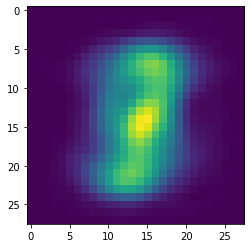

torch.Size([32, 784])


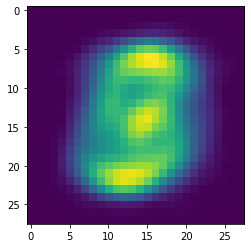

torch.Size([32, 784])


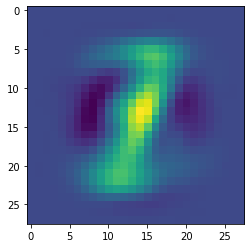

torch.Size([32, 784])


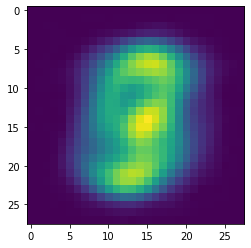

torch.Size([32, 784])


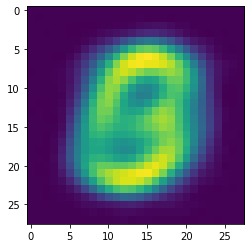

torch.Size([32, 784])


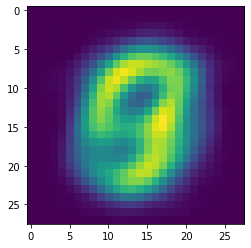

torch.Size([32, 784])


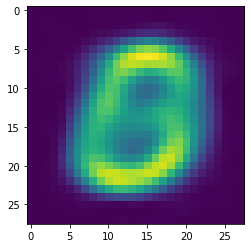

torch.Size([32, 784])


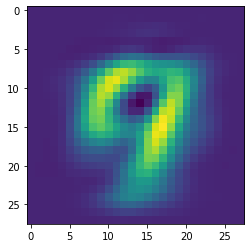

torch.Size([32, 784])


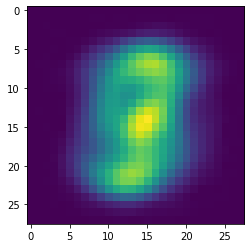

torch.Size([32, 784])


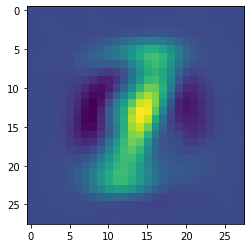

torch.Size([32, 784])


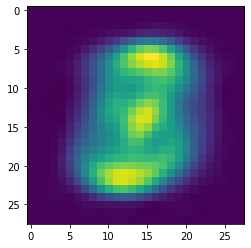

torch.Size([32, 784])


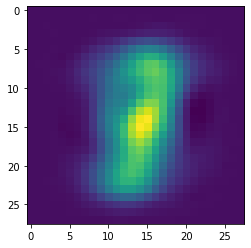

torch.Size([32, 784])


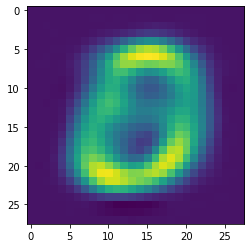

torch.Size([32, 784])


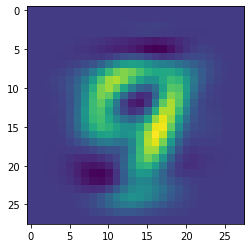

torch.Size([32, 784])


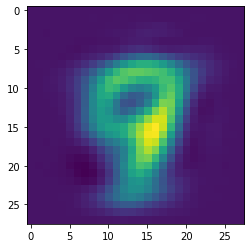

torch.Size([32, 784])


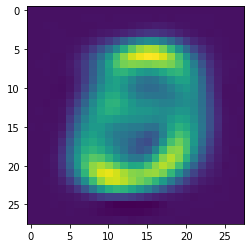

torch.Size([32, 784])


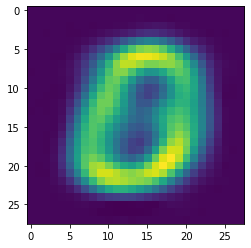

torch.Size([32, 784])


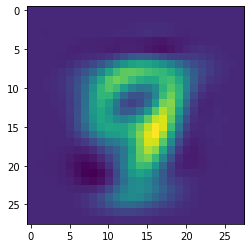

torch.Size([32, 784])


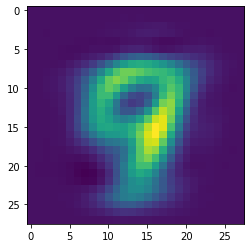

torch.Size([32, 784])


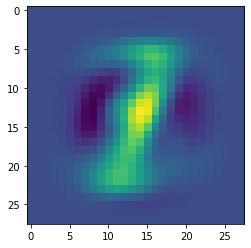

torch.Size([32, 784])


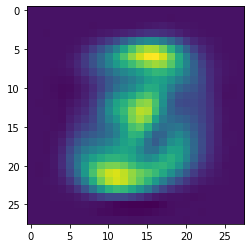

torch.Size([32, 784])


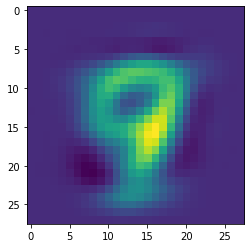

torch.Size([32, 784])


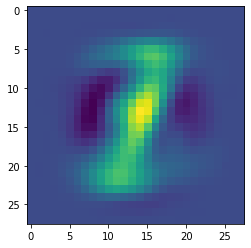

torch.Size([32, 784])


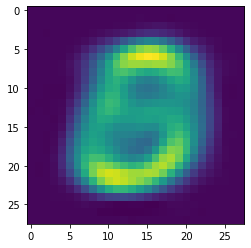

torch.Size([32, 784])


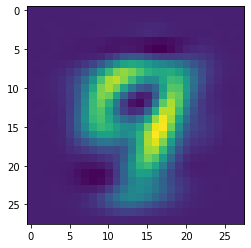

torch.Size([32, 784])


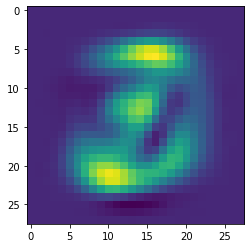

torch.Size([32, 784])


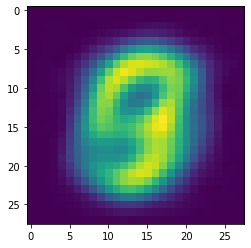

torch.Size([32, 784])


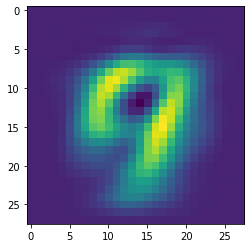

torch.Size([32, 784])


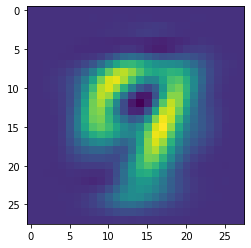

torch.Size([32, 784])


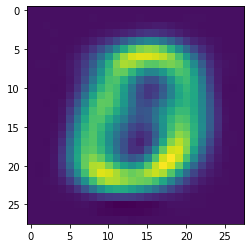

torch.Size([32, 784])


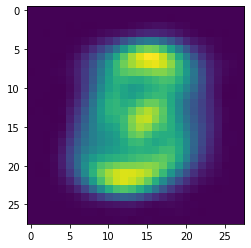

torch.Size([32, 784])


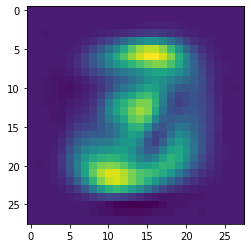

torch.Size([32, 784])


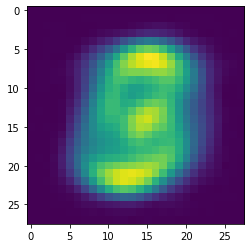

torch.Size([32, 784])


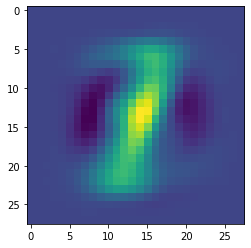

torch.Size([32, 784])


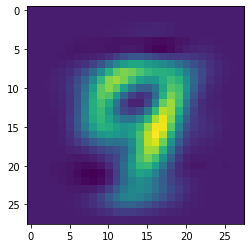

torch.Size([32, 784])


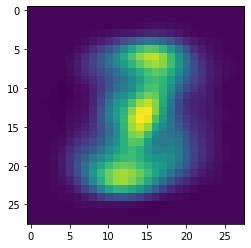

torch.Size([32, 784])


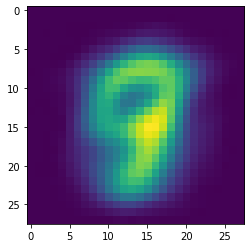

torch.Size([32, 784])


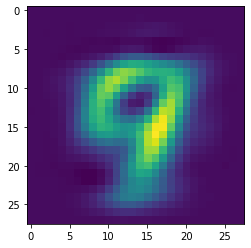

torch.Size([32, 784])


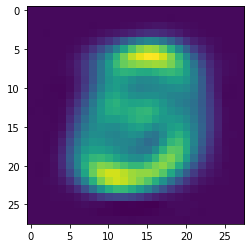

torch.Size([32, 784])


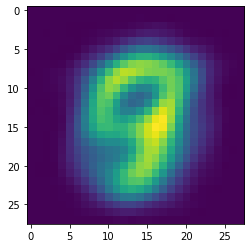

torch.Size([32, 784])


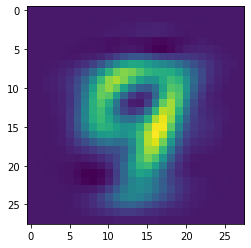

torch.Size([32, 784])


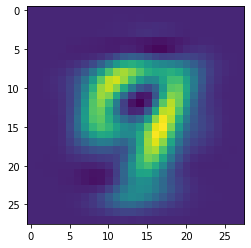

torch.Size([32, 784])


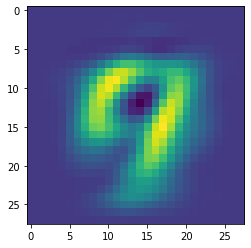

torch.Size([32, 784])


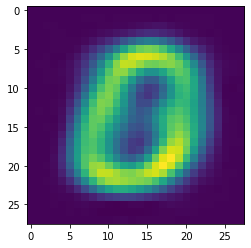

torch.Size([32, 784])


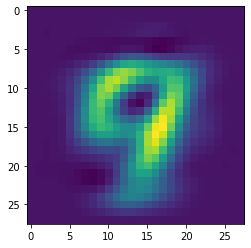

torch.Size([32, 784])


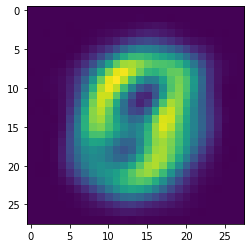

torch.Size([32, 784])


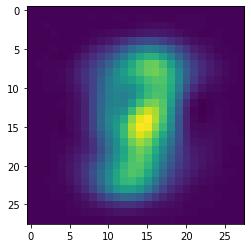

torch.Size([32, 784])


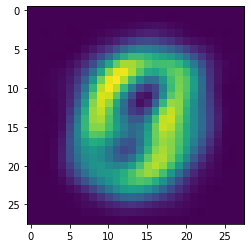

torch.Size([32, 784])


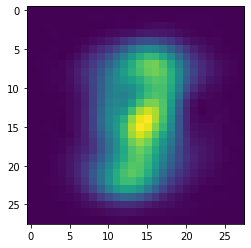

torch.Size([32, 784])


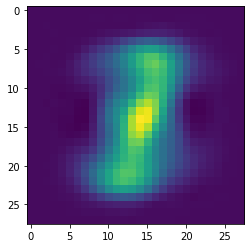

torch.Size([32, 784])


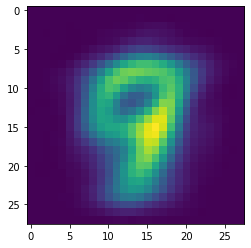

torch.Size([32, 784])


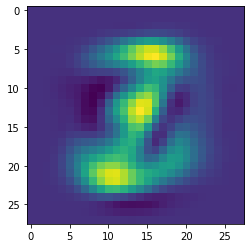

torch.Size([32, 784])


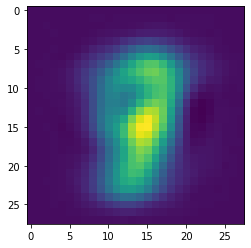

torch.Size([32, 784])


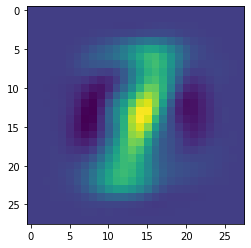

torch.Size([32, 784])


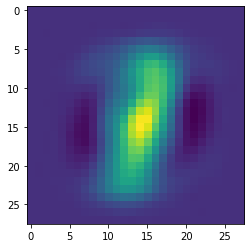

torch.Size([32, 784])


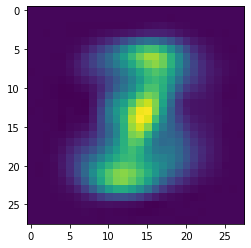

torch.Size([32, 784])


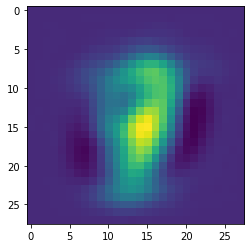

torch.Size([32, 784])


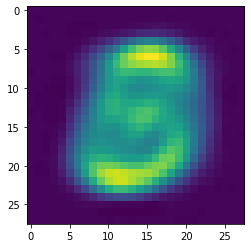

torch.Size([32, 784])


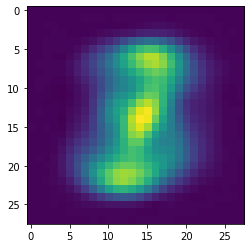

torch.Size([32, 784])


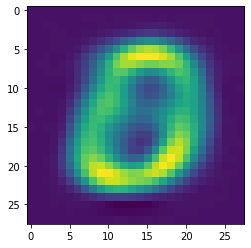

torch.Size([16, 784])


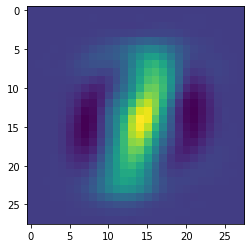

In [ ]:
for batch_features, _ in test_loader:
    batch_features = batch_features.view(-1, 784).to(device)  
    outputs = model(batch_features)
    print(outputs.shape)
    plt.imshow(outputs[0].cpu().detach().view(28, 28).numpy())
    plt.show()

        